In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [7]:
# Load the California Housing dataset
california = fetch_california_housing()
df = pd.DataFrame(california.data, columns=california.feature_names)
df['PRICE'] = california.target

# Display the first few rows of the dataframe
print(df.head())



   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  PRICE  
0    -122.23  4.526  
1    -122.22  3.585  
2    -122.24  3.521  
3    -122.25  3.413  
4    -122.25  3.422  


In [8]:
# Check for missing values
print(df.isnull().sum())


MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
PRICE         0
dtype: int64


In [20]:
# Calculate mean, median, and standard deviation for a specific column, e.g., 'MedHouseVal'
mean_val = df['MedHouseVal'].mean()
median_val = df['MedHouseVal'].median()
std_dev = df['MedHouseVal'].std()

print(f"Mean: {mean_val}")
print(f"Median: {median_val}")
print(f"Standard Deviation: {std_dev}")


Mean: 2.068558169089147
Median: 1.797
Standard Deviation: 1.1539561587441387


In [22]:
# Calculate the range (max - min) of a specific column, e.g., 'MedInc'
range_val = df['MedInc'].max() - df['MedInc'].min()
print(f"Range of Median Income: {range_val}")


Range of Median Income: 14.5002


In [11]:
# Select features and target variable
X = df.drop('PRICE', axis=1)
y = df['PRICE']
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Initialize the Linear Regression model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)
# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared Score: {r2}')


Mean Squared Error: 0.555891598695244
R-squared Score: 0.5757877060324511


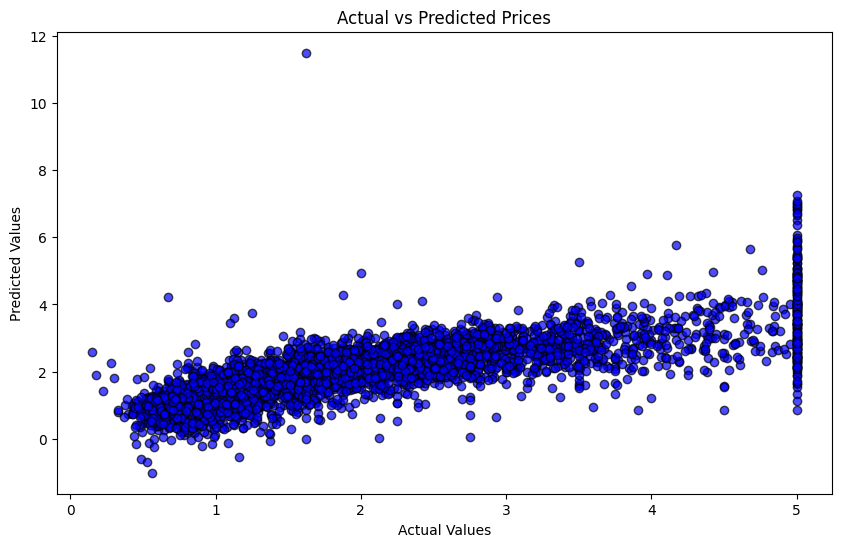

In [12]:
# Plot predicted vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', edgecolor='k', alpha=0.7)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Prices')
plt.show()


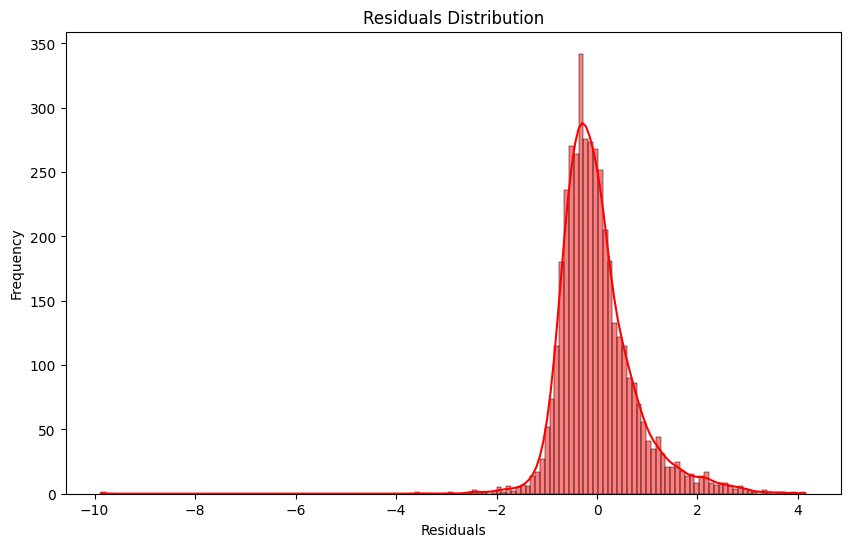

In [13]:
# Plot the residuals
plt.figure(figsize=(10, 6))
residuals = y_test - y_pred
sns.histplot(residuals, kde=True, color='red')
plt.title('Residuals Distribution')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()


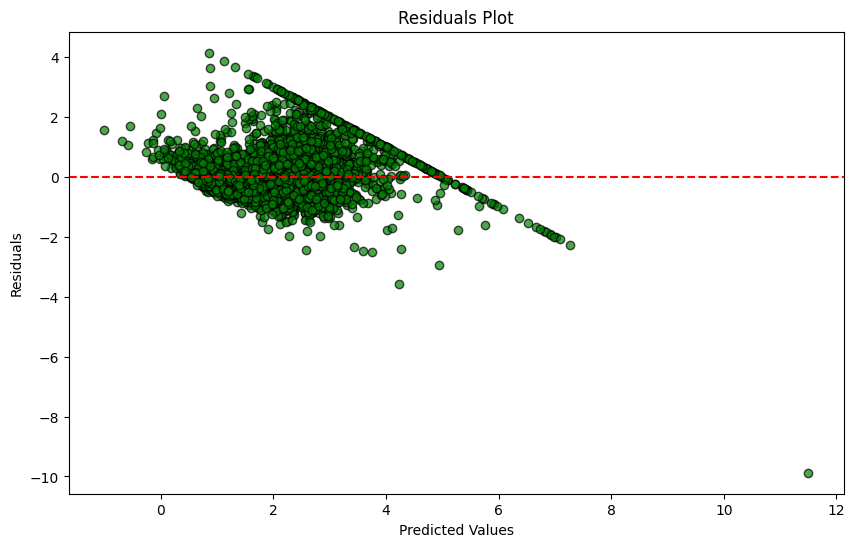

In [15]:
# Residuals
residuals = y_test - y_pred

plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, color='green', edgecolor='k', alpha=0.7)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.show()



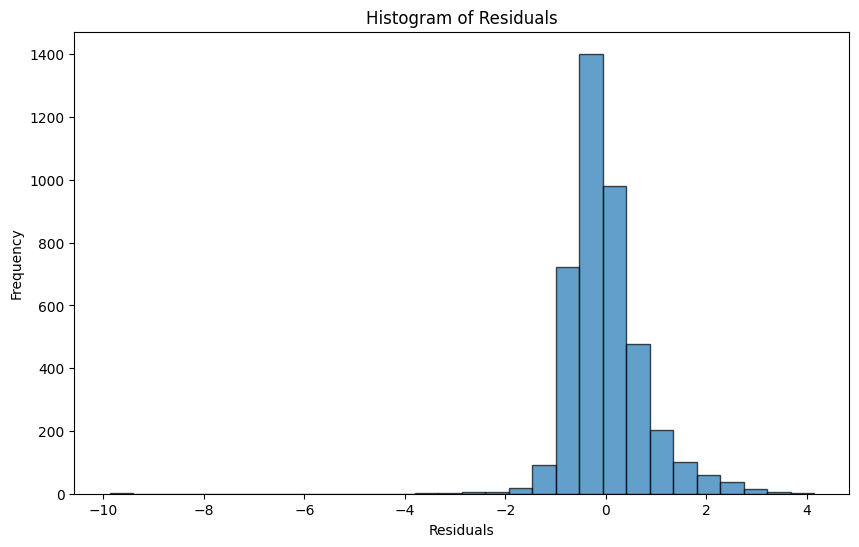

In [16]:

# Histogram of residuals
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=30, edgecolor='k', alpha=0.7)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.show()


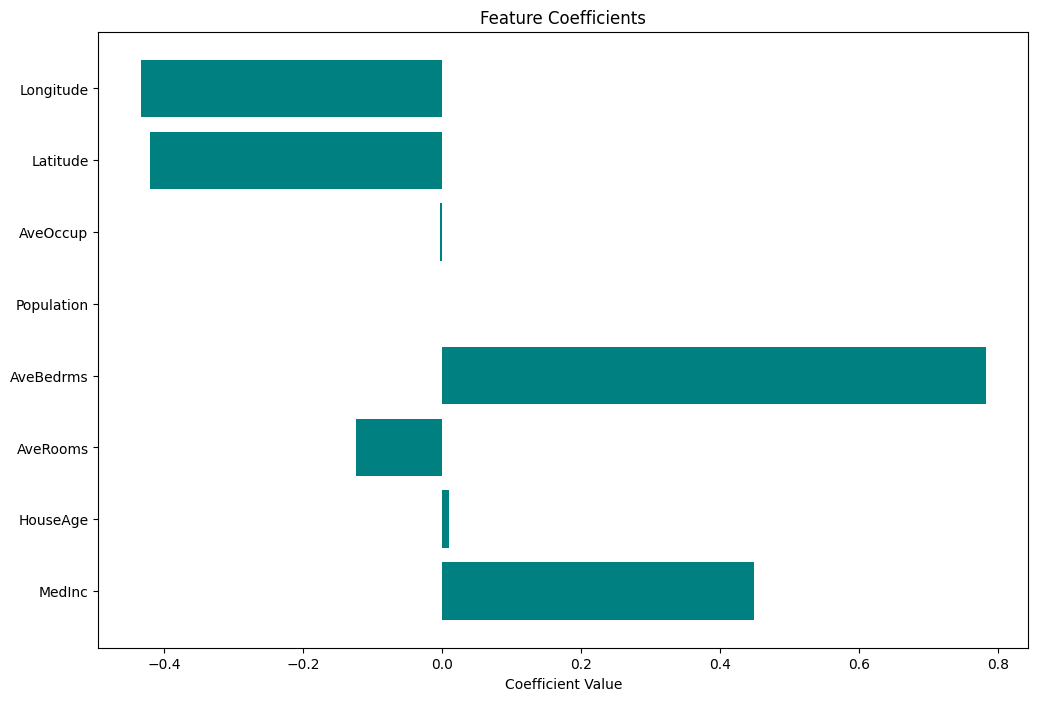

In [17]:
# Get feature importances (coefficients)
coef = model.coef_
features = X.columns

plt.figure(figsize=(12, 8))
plt.barh(features, coef, color='teal')
plt.xlabel('Coefficient Value')
plt.title('Feature Coefficients')
plt.show()


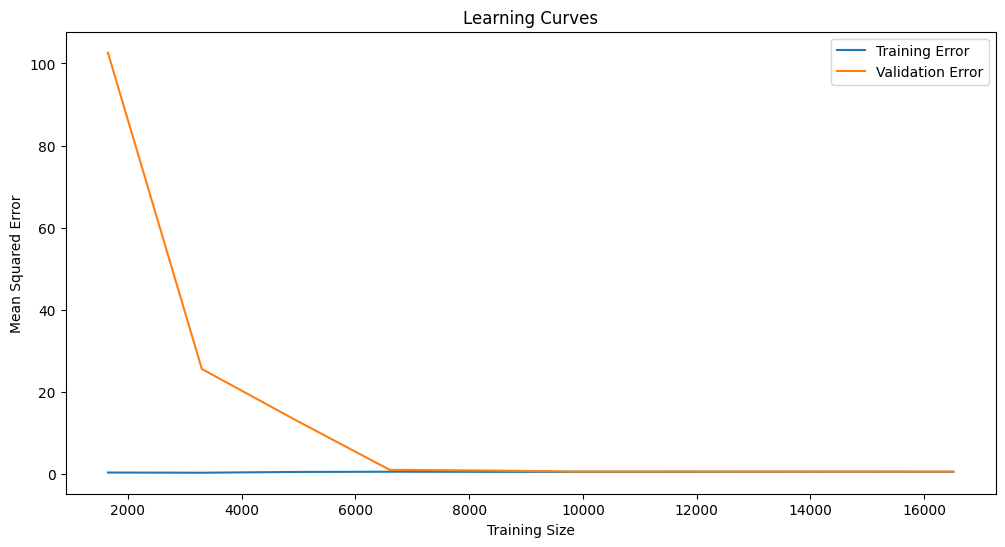

In [18]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    model, X, y, cv=5, scoring='neg_mean_squared_error', 
    train_sizes=np.linspace(0.1, 1.0, 10)
)

# Compute mean and standard deviation of training scores
train_scores_mean = -train_scores.mean(axis=1)
test_scores_mean = -test_scores.mean(axis=1)

plt.figure(figsize=(12, 6))
plt.plot(train_sizes, train_scores_mean, label='Training Error')
plt.plot(train_sizes, test_scores_mean, label='Validation Error')
plt.xlabel('Training Size')
plt.ylabel('Mean Squared Error')
plt.title('Learning Curves')
plt.legend()
plt.show()


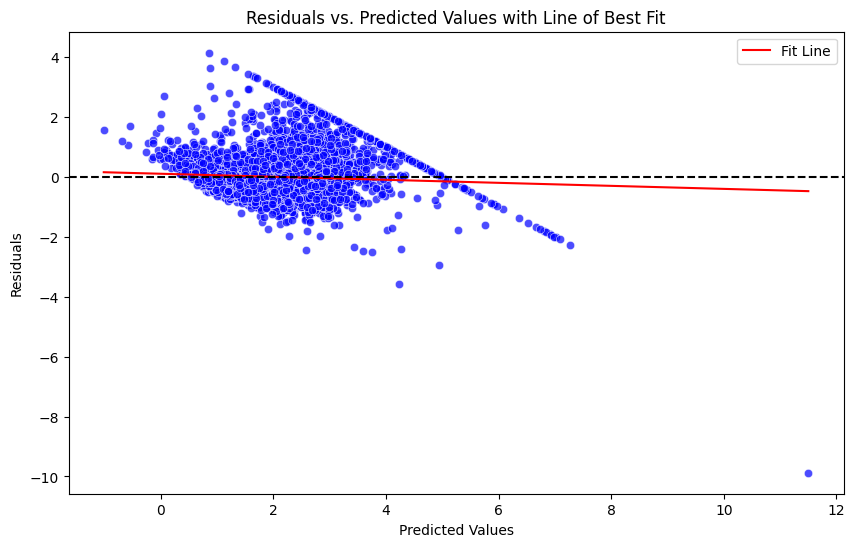

In [19]:
from sklearn.linear_model import LinearRegression
import seaborn as sns

# Fit a linear model to residuals vs. predicted values
model_residuals = LinearRegression().fit(y_pred.reshape(-1, 1), residuals)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred, y=residuals, color='blue', alpha=0.7)
sns.lineplot(x=y_pred, y=model_residuals.predict(y_pred.reshape(-1, 1)), color='red', label='Fit Line')
plt.axhline(0, color='black', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Values with Line of Best Fit')
plt.legend()
plt.show()


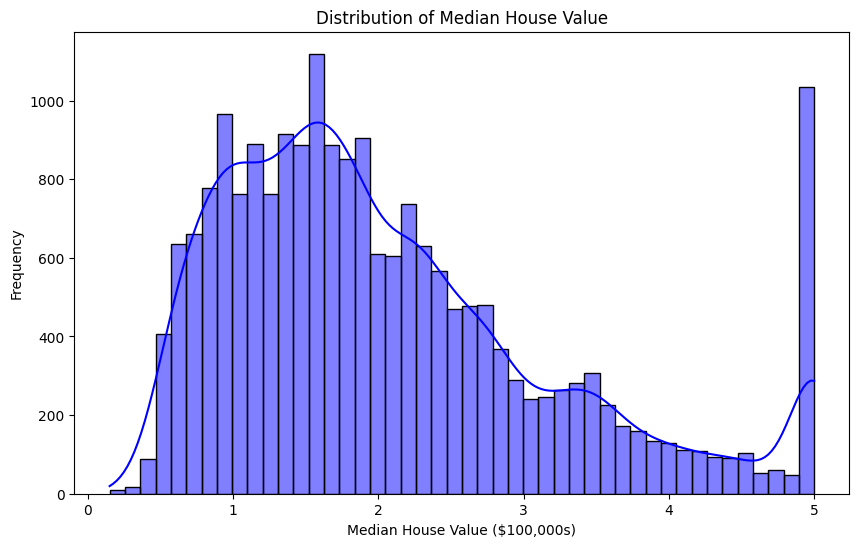

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.datasets import fetch_california_housing

# Load the California Housing dataset
california_housing = fetch_california_housing(as_frame=True)
df = california_housing.frame

# Rename the target variable for easier reference
df.rename(columns={'MedHouseVal': 'MedHouseVal'}, inplace=True)

# Plot the distribution of the target variable (Median House Value)
plt.figure(figsize=(10, 6))
sns.histplot(df['MedHouseVal'], kde=True, color='blue')
plt.title('Distribution of Median House Value')
plt.xlabel('Median House Value ($100,000s)')
plt.ylabel('Frequency')
plt.show()




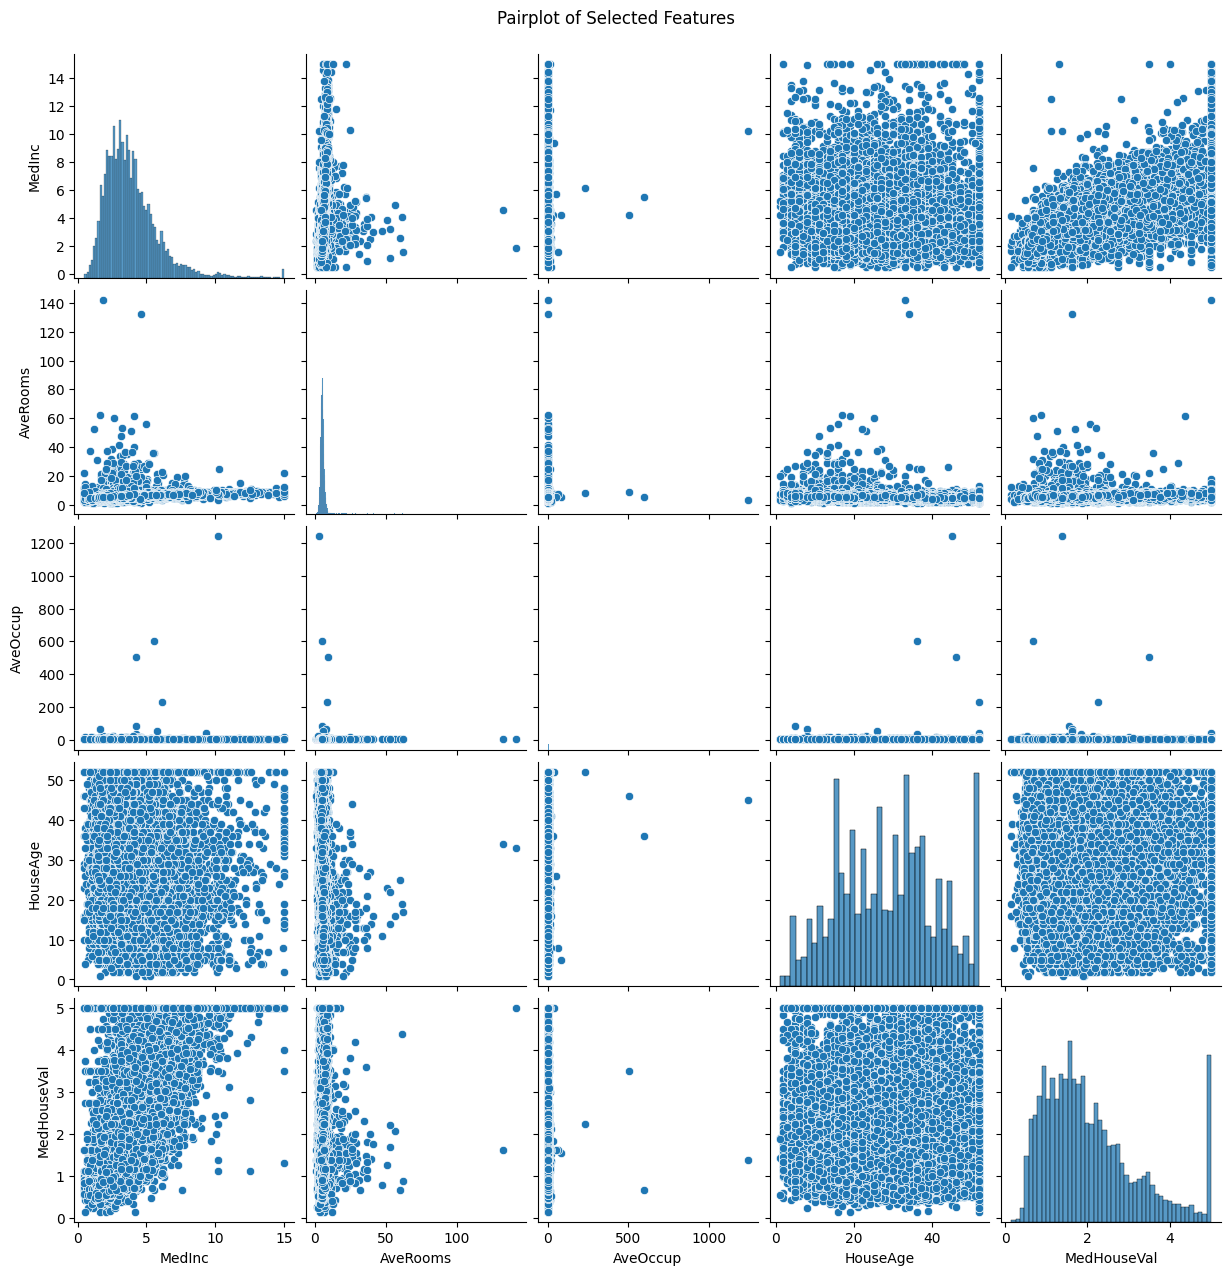

In [9]:
sns.pairplot(df[['MedInc', 'AveRooms', 'AveOccup', 'HouseAge', 'MedHouseVal']])
plt.suptitle('Pairplot of Selected Features', y=1.02)
plt.show()

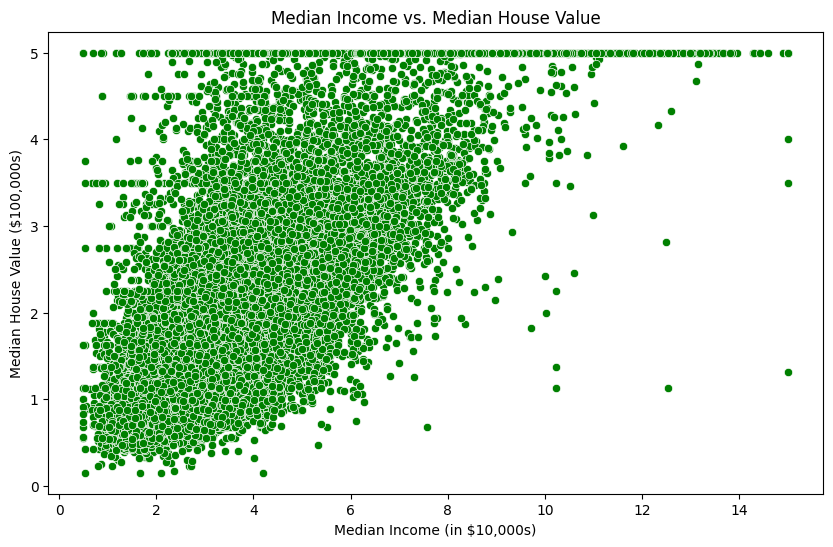

In [16]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='MedInc', y='MedHouseVal', data=df, color='green')
plt.title('Median Income vs. Median House Value')
plt.xlabel('Median Income (in $10,000s)')
plt.ylabel('Median House Value ($100,000s)')
plt.show()


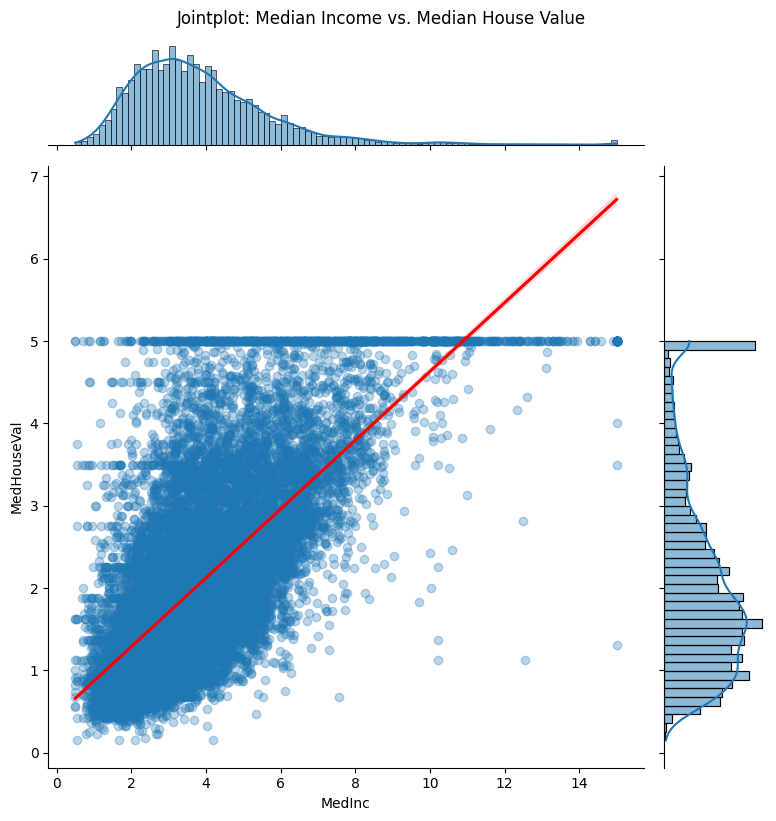

In [12]:
sns.jointplot(x='MedInc', y='MedHouseVal', data=df, kind='reg', height=8, scatter_kws={'alpha':0.3}, line_kws={'color':'red'})
plt.suptitle('Jointplot: Median Income vs. Median House Value', y=1.02)
plt.show()


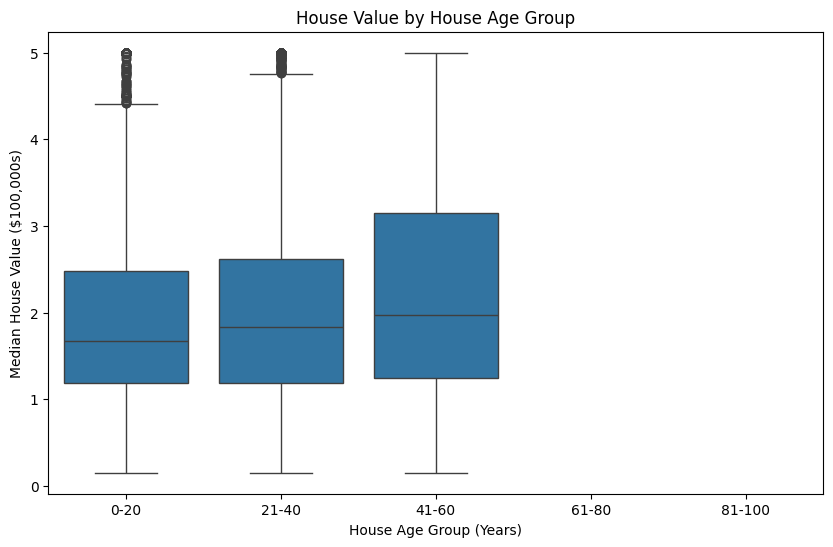

In [10]:
plt.figure(figsize=(10, 6))
df['HouseAgeGroup'] = pd.cut(df['HouseAge'], bins=[0, 20, 40, 60, 80, 100], labels=['0-20', '21-40', '41-60', '61-80', '81-100'])
sns.boxplot(x='HouseAgeGroup', y='MedHouseVal', data=df)
plt.title('House Value by House Age Group')
plt.xlabel('House Age Group (Years)')
plt.ylabel('Median House Value ($100,000s)')
plt.show()


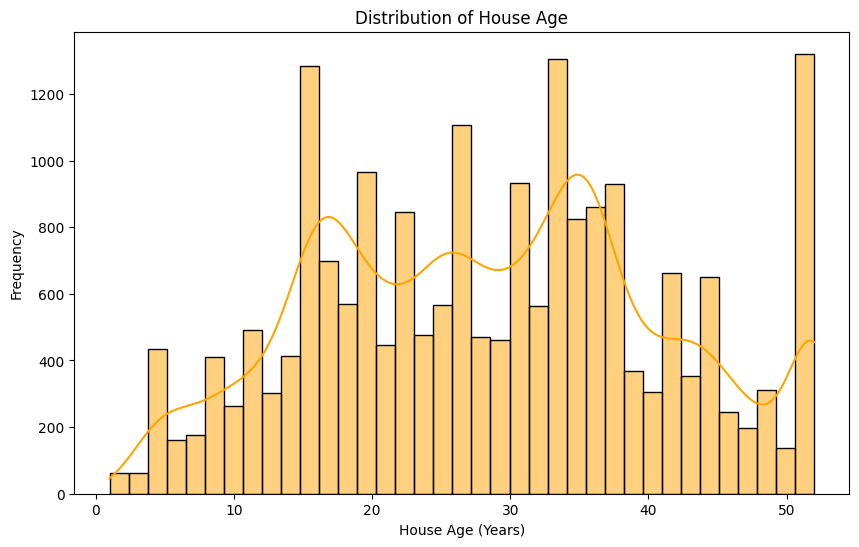

In [14]:
plt.figure(figsize=(10, 6))
sns.histplot(df['HouseAge'], kde=True, color='orange')
plt.title('Distribution of House Age')
plt.xlabel('House Age (Years)')
plt.ylabel('Frequency')
plt.show()

